# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [96]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")
cities = [city.title() for city in cities]


Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [97]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    

        #Append the City information into city_data list
        city_info = ({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        city_data.append(city_info)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 

print("----------------")
print("Data Loading Complete")
print("-----------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Ribeira Grande
Processing Record 2 of Set 1 | Cabedelo
Processing Record 3 of Set 1 | Atasu
Processing Record 4 of Set 1 | Vorgashor
Processing Record 5 of Set 1 | Karimpur
Processing Record 6 of Set 1 | Nukunonu
City not found. Skipping...
Processing Record 7 of Set 1 | Pijijiapan
Processing Record 8 of Set 1 | Edinburgh Of The Seven Seas
Processing Record 9 of Set 1 | San Patricio
Processing Record 10 of Set 1 | Papatowai
Processing Record 11 of Set 1 | Adamstown
Processing Record 12 of Set 1 | Pampas
Processing Record 13 of Set 1 | Kodiak
Processing Record 14 of Set 1 | Hamilton
Processing Record 15 of Set 1 | Rawson
Processing Record 16 of Set 1 | Senanga
Processing Record 17 of Set 1 | Waitangi
Processing Record 18 of Set 1 | Anadyr
Processing Record 19 of Set 1 | Bethel
Processing Record 20 of Set 1 | Kurchum
Processing Record 21 of Set 1 | Port-Aux-Francais
Processing Record 22 of Set 1 | 

In [98]:
# Convert the cities weather data into a Pandas DataFrame
#https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
city_data_df = pd.DataFrame(city_data)
    

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [99]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,299.37,78,20,6.17,PT,1691593237
1,Cabedelo,-6.9811,-34.8339,301.52,63,71,6.17,BR,1691593237
2,Atasu,48.6814,71.6433,298.64,43,51,2.90,KZ,1691593237
3,Vorgashor,67.5833,63.9500,285.71,60,97,1.83,RU,1691593237
4,Karimpur,23.9667,88.6167,300.64,79,99,1.78,IN,1691593237


In [100]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [101]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ribeira Grande,38.5167,-28.7000,299.37,78,20,6.17,PT,1691593237
1,Cabedelo,-6.9811,-34.8339,301.52,63,71,6.17,BR,1691593237
2,Atasu,48.6814,71.6433,298.64,43,51,2.90,KZ,1691593237
3,Vorgashor,67.5833,63.9500,285.71,60,97,1.83,RU,1691593237
4,Karimpur,23.9667,88.6167,300.64,79,99,1.78,IN,1691593237


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

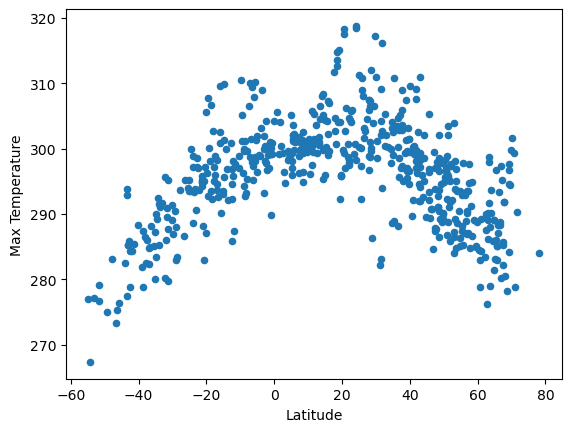

In [102]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

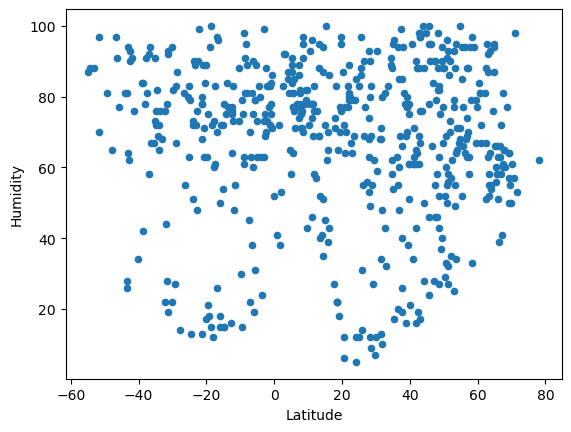

In [103]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

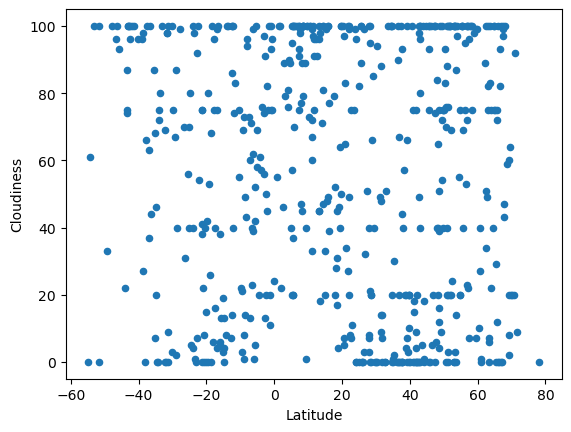

In [104]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

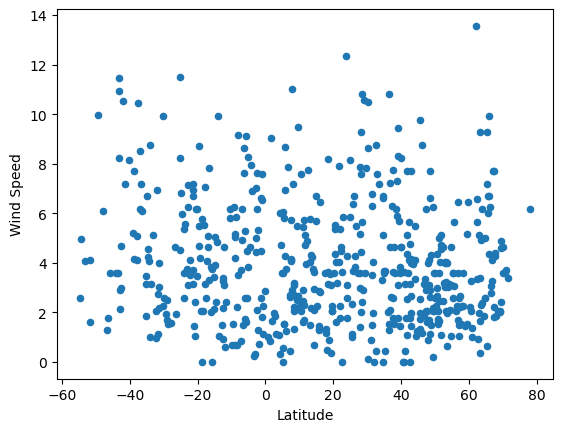

In [105]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [107]:
# Define a function to create Linear Regression plots

#LOOK AT THIS

slope, intercept, rvalue, pvalue, stderr = linregress(city_data_df['Lat'],city_data_df['Wind Speed'])
regress_values = x_values*slope + intercept 

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

city_data_df = city_data_df.astype({'Lat':'float'})

northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
nh_temp_fit = x_values*slope + intercept

#graphing scatter plot and linear regression
northern_hemi_df.plot(kind="scatter",x='Lat',y='Max Temp')
plt.plot(x_values, nh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
sh_temp_fit = x_values*slope + intercept

#Creating scatter plot
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp')
plt.plot(x_values, sh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

**Discussion about the linear relationship:** 
These graphs show there is a correlation between the Latitude and Max Temperatures. We can see that as locations get closer to the equator the temperature rises significantly and as the places get further away from the equator the temperature drops significantly. 

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
nh_temp_fit = x_values*slope + intercept

#Creating scatter plot
northern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.plot(x_values, nh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
sh_temp_fit = x_values*slope + intercept

#Creating scatter plot
southern_hemi_df.plot(kind='scatter', x='Lat', y='Humidity')
plt.plot(x_values, sh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
The regression line would indicate that there is little correlation between latitude and humidity, as the slope appears to be nearly zero. But looking at the scatter plot it looks like there are still some patterns. For example it appears that cities close to the equator and far away from the equator tend to be drier, but cities between 20-30 degrees from the equator tend to be a little more humid. It would be interesting to only look at data between 0 and 40 degrees from the equator to see if that dataset would show more correlation between humidity and distance from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
nh_temp_fit = x_values*slope + intercept

#Creating scatter plot
northern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.plot(x_values, nh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
sh_temp_fit = x_values*slope + intercept

#Creating scatter plot
southern_hemi_df.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.plot(x_values, sh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 
These graphs don't seem to indicate a strong relationship between degress away from the equator and cloudiness. We would expect the graphs to mirror each other if that was the case. 

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
nh_temp_fit = x_values*slope + intercept

#Creating scatter plot
northern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.plot(x_values, nh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
sh_temp_fit = x_values*slope + intercept

#Creating scatter plot
southern_hemi_df.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.plot(x_values, sh_temp_fit, 'r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
These graphs don't seem to indicate a strong relationship between degress away from the equator and cloudiness. We would expect the graphs to mirror each other if that was the case. 